In [1]:
%matplotlib inline
%gui

In [22]:
import chainer
from chainer import serializers
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [46]:
import net, data
import importlib
importlib.reload(net)

<module 'net' from '/Users/quolc/pathology/deep/chainer-examples/mnist-stacked-cae/net.py'>

In [71]:
model = net.Regression(net.DCAE(28, [(7, 20, 0, 2)],  [], 'relu'))

[network architecture]
input: 1x28x28
conv0: 20x7x7 (pad0)
 -> 20x22x22
pool0: 2x2
 -> 20x11x11



In [72]:
#serializers.load_npz('./relu_5x8filters_1000hidden_epoch200_noise0.model', model)
serializers.load_npz('./08150246.model', model)

In [73]:
model.predictor.conv0.W.data.shape

(20, 1, 7, 7)

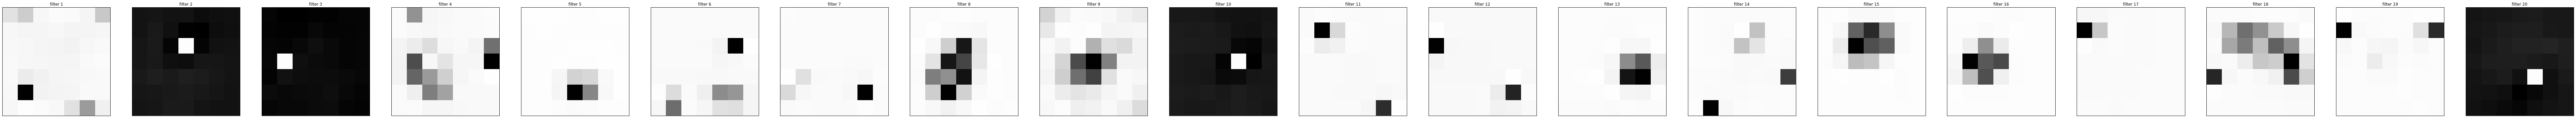

In [74]:
# フィルタの重み可視化
n_filters = model.predictor.conv0.W.data.shape[0]
filter_size = model.predictor.conv0.W.data.shape[2]
fig, axes = plt.subplots(1, n_filters, figsize=(filter_size*n_filters, filter_size))
for i in range(n_filters):
    f = model.predictor.conv0.W.data[i]
    axes[i].set_xticks([]); axes[i].set_yticks([])
    axes[i].set_title('filter ' + str(i+1))
    axes[i].imshow(f.reshape((filter_size, filter_size)), cmap=cm.Greys_r, interpolation='none')

In [75]:
# MNISTデータ読み込み
mnist = data.load_mnist_data()
mnist['data'] = mnist['data'].astype(np.float32)
mnist['data'] /= 255
x_train, x_test = np.split(mnist['data'], [data.num_train])
x_train = x_train.reshape((len(x_train), 1, 28, 28))
x_test = x_test.reshape((len(x_test), 1, 28, 28))

AttributeError: 'numpy.ndarray' object has no attribute 'load_mnist_data'

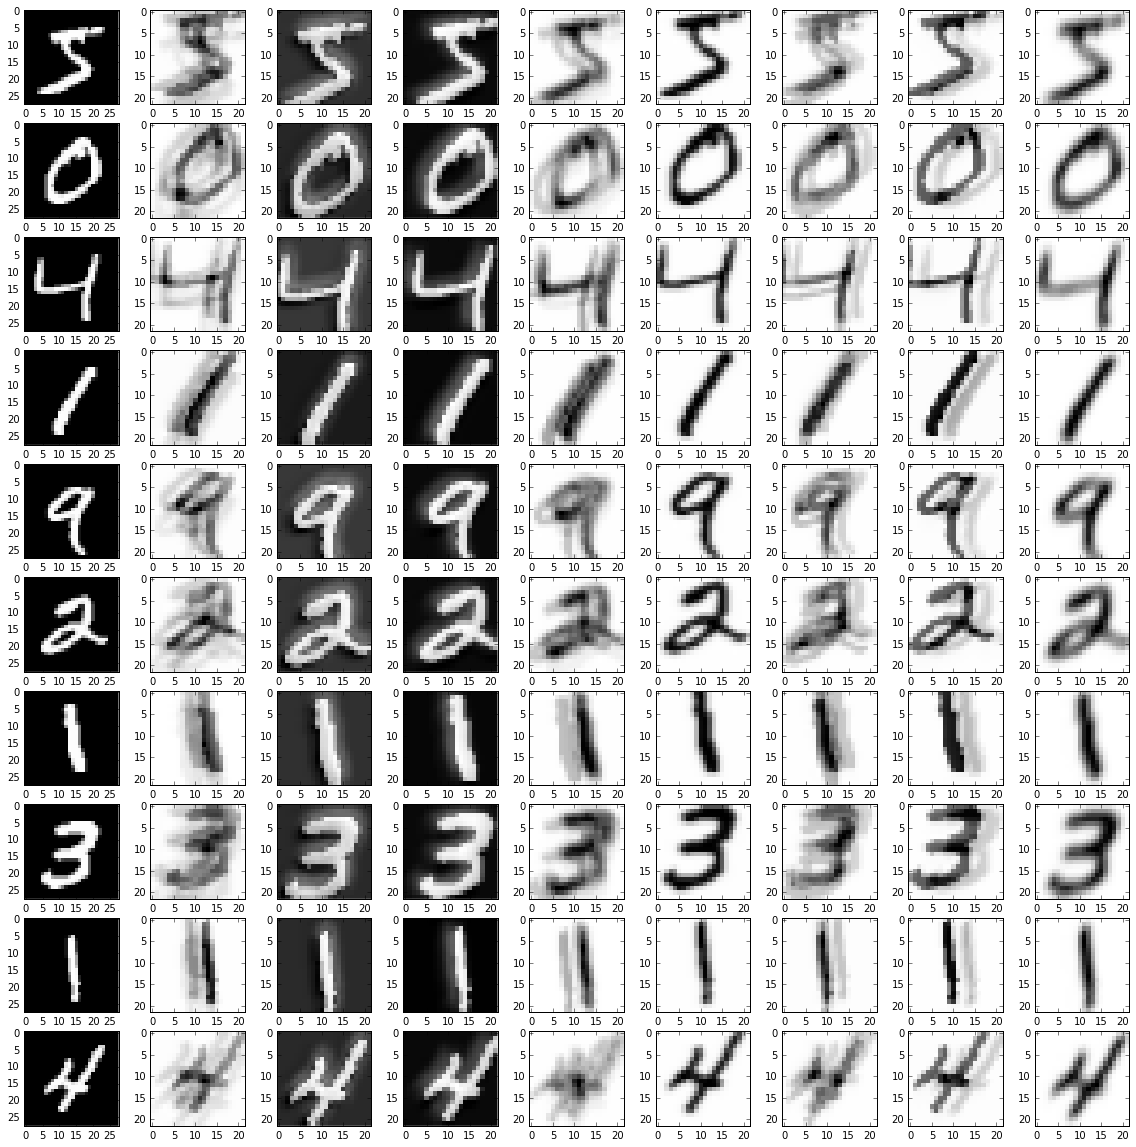

In [76]:
data = x_train[0:10]
var = chainer.Variable(data)
conved = model.predictor.conv0(var)
fig, axes = plt.subplots(10, 9, figsize=(20,20))

dim = 28 - model.predictor.conv0.W.data[0].shape[1] + 1

for i in range(0, 10):
    axes[i,0].imshow(data[i].reshape((28, 28)), cmap=cm.Greys_r, interpolation='none')
    for j in range(0, 8):
        axes[i,j+1].imshow(conved.data[i][j].reshape((dim, dim)), cmap=cm.Greys_r, interpolation='none')